In [58]:
import numpy as np

x = np.zeros((100,))
x[:60] = 1
dists = {}
for i in range(50000):
    # x = np.random.permutation(x)
    x = (np.random.random_sample(100) < 0.6).astype(np.float64)
    ax = x.reshape(10, 10)

    pos = []
    for ix in range(10):
        for iy in range(10):
            if ax[ix, iy] == 1:
                pos.append((ix, iy))

    for _ in range(10):
        ij = np.random.randint(len(pos), size=2)
        d = (pos[ij[0]][0] - pos[ij[1]][0], pos[ij[0]][1] - pos[ij[1]][1])
        d = (d[0] % 10, d[1] % 10)
        if d not in dists:
            dists[d] = 0
        dists[d] += 1


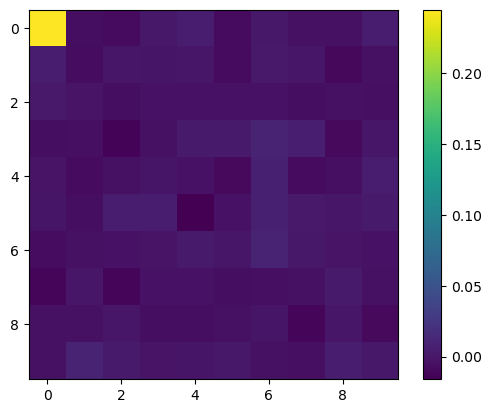

In [59]:
import matplotlib.pyplot as plt

keys = list(dists.keys())
xmax = max(x for x,y in keys)
xmin = min(x for x,y in keys)
ymax = max(y for x,y in keys)
ymin = min(y for x,y in keys)

corr = np.zeros((xmax-xmin+1, ymax-ymin+1))
for key, value in dists.items():
	corr[key[0]-xmin, key[1]-ymin] += value
	
plt.imshow(corr/corr.sum() * 60 * 0.6 - 0.6*0.6)
plt.colorbar()

In [52]:
corr.sum()

100000.0

In [12]:
0.9 * 0.9

0.81

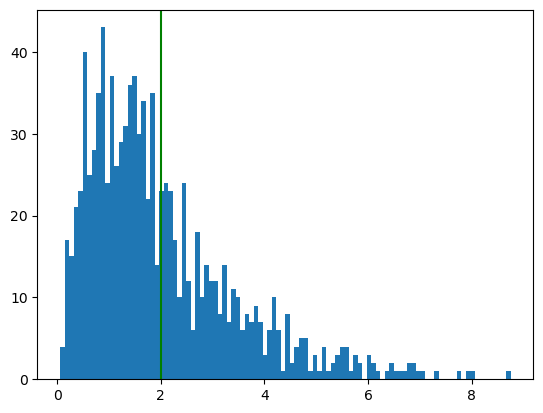

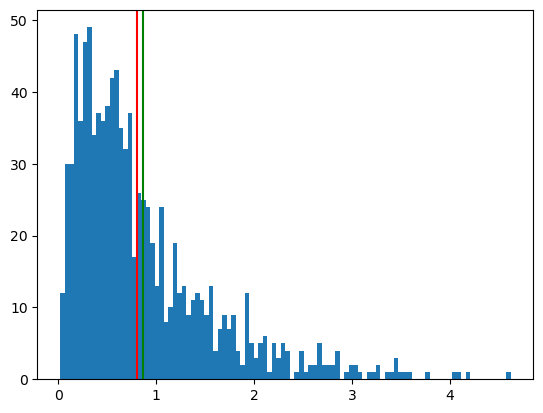

In [24]:
import scipy.stats.sampling
import numpy as np
import matplotlib.pyplot as plt

class pdf:
    def pdf(self, x):
        return x*np.exp(-x)

s = scipy.stats.sampling.NumericalInversePolynomial(pdf(), domain=[0, 10])
xs = s.rvs(1000)
plt.hist(xs, bins=100)
plt.axvline(xs.mean(), color="green")
plt.figure()
ys = np.log(xs + 1) / 10 + 0.3
# plt.scatter(xs, ys)
plt.hist(xs * ys, bins=100)
plt.axvline(xs.mean() * ys.mean(), color="red")
plt.axvline((xs * ys).mean(), color="green")